# Importando os pacotes

In [72]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Lendo os dados

In [18]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [19]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Tratando os dados

Vamos separar os valores da coluna Age (idade) em seis categorias

In [20]:
train['Age'] = pd.cut(train['Age'], 6, labels = [1,2,3,4,5,6])

In [21]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,2,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,2,0,0,111369,30.0000,C148,C


Abaixo temos um exemplo do que o comando "cut" realiza num dataframe

In [22]:
s = pd.Series(np.array([2,4,6,8,10]), index = ['a', 'b', 'c', 'd', 'e'])

In [23]:
s

a     2
b     4
c     6
d     8
e    10
dtype: int64

In [24]:
pd.cut(s,3)

a    (1.992, 4.667]
b    (1.992, 4.667]
c    (4.667, 7.333]
d     (7.333, 10.0]
e     (7.333, 10.0]
dtype: category
Categories (3, interval[float64]): [(1.992, 4.667] < (4.667, 7.333] < (7.333, 10.0]]

Fazemos a mesma divisãão em 6 categorias para os valores da coluna Fare

In [25]:
train['Fare'] = pd.cut(train['Fare'], 6, labels = [1,2,3,4,5,6])

Com as modificações feitas, definimos finalmente o dataframe que será realmente utilizado no treinamento

In [26]:
df_train = train[['Sex', 'Fare', 'Age', 'SibSp', 'Pclass', 'Embarked']]
df_train

,Sex,Fare,Age,SibSp,Pclass,Embarked
0,male,1,2,1,3,S
1,female,1,3,1,1,C
2,female,1,2,0,3,S
3,female,1,3,1,1,S
4,male,1,3,0,3,S
...,...,...,...,...,...,...
886,male,1,3,0,2,S
887,female,1,2,0,1,S
888,female,1,NaN,1,3,S
889,male,1,2,0,1,C


In [31]:
x = pd.get_dummies(df_train)
ans = pd.get_dummies(train[['Survived']])

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


Separação do dataset em parte de treino e de validação

In [33]:
x_train = x[:int(0.8*len(x))]
x_val = x[int(0.8*len(x)):]

ans_train = ans[:int(0.8*len(ans))]
ans_val = ans[int(0.8*len(ans)):]

In [41]:
network = Sequential([
                      Dense(64, activation = 'relu', input_shape = (19,)),
                      Dense(32, activation = 'relu'),
                      Dropout(0.4),
                      Dense(16, activation = 'relu'),
                      Dense(8, activation = 'relu'),
                      Dense(4, activation = 'relu'),
                      Dense(1, activation = 'sigmoid')
                      ])

network.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )

In [42]:
history = network.fit(
    x_train,
    ans_train,
    batch_size = 10,
    epochs = 30,
    validation_data = (x_val, ans_val)
)

Epoch 1/30
72/72 [==============================] - 0s 4ms/step - loss: 0.6620 - accuracy: 0.6011 - val_loss: 0.5938 - val_accuracy: 0.6425
Epoch 2/30
72/72 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.6601 - val_loss: 0.5116 - val_accuracy: 0.8045
Epoch 3/30
72/72 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7640 - val_loss: 0.4714 - val_accuracy: 0.8101
Epoch 4/30
72/72 [==============================] - 0s 2ms/step - loss: 0.5182 - accuracy: 0.7978 - val_loss: 0.4388 - val_accuracy: 0.8324
Epoch 5/30
72/72 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.8034 - val_loss: 0.4255 - val_accuracy: 0.8268
Epoch 6/30
72/72 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.8034 - val_loss: 0.3909 - val_accuracy: 0.8659
Epoch 7/30
72/72 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8118 - val_loss: 0.3923 - val_accuracy: 0.8380
Epoch 8/30
72/72 [==

In [43]:
history

# Teste da rede

Utilizamos o conjunto de dados de validação para avaliar o desempenho da rede.

In [67]:
k = network.predict(x_val)

real_alive = k[np.where(ans_val == 1)]
real_dead = k[np.where(ans_val == 0)]

# Curva roc

Vamos definir as variáveis para montar a curva Roc do problema a partir dos dados de validação.

In [68]:
Tp = []
Fp = []
Fn = []
Tn = []

Tpr = []
Fpr = []

In [70]:
threshold = np.linspace(0,1,100)

for i in range(len(threshold)):
    Tp.append(len(real_alive[np.where(real_alive>threshold[i])]))
    Fp.append(len(real_dead[np.where(real_dead>threshold[i])]))
    Fn.append(len(real_alive[np.where(real_alive<threshold[i])]))
    Tn.append(len(real_dead[np.where(real_dead<threshold[i])]))
    
    Tpr.append(Tp[i]/(Tp[i] + Fn[i]))
    Fpr.append(Fp[i]/(Fp[i] + Tn[i]))

In [126]:
roc = [Fpr, Tpr]
roc = np.array(roc).reshape(2,len(Fpr)).T

roc = roc[np.argsort(roc[:,0])]

roc

array([[0.        , 0.        ],
       [0.        , 0.0625    ],
       [0.        , 0.25      ],
       [0.00869565, 0.265625  ],
       [0.00869565, 0.296875  ],
       [0.00869565, 0.3125    ],
       [0.00869565, 0.34375   ],
       [0.00869565, 0.40625   ],
       [0.0173913 , 0.4375    ],
       [0.0173913 , 0.484375  ],
       [0.0173913 , 0.515625  ],
       [0.02608696, 0.671875  ],
       [0.02608696, 0.671875  ],
       [0.02608696, 0.65625   ],
       [0.02608696, 0.65625   ],
       [0.02608696, 0.625     ],
       [0.02608696, 0.609375  ],
       [0.02608696, 0.59375   ],
       [0.02608696, 0.546875  ],
       [0.02608696, 0.609375  ],
       [0.03478261, 0.6875    ],
       [0.03478261, 0.6875    ],
       [0.07826087, 0.703125  ],
       [0.09565217, 0.703125  ],
       [0.09565217, 0.703125  ],
       [0.09565217, 0.703125  ],
       [0.09565217, 0.703125  ],
       [0.09565217, 0.703125  ],
       [0.09565217, 0.703125  ],
       [0.09565217, 0.703125  ],
       [0.

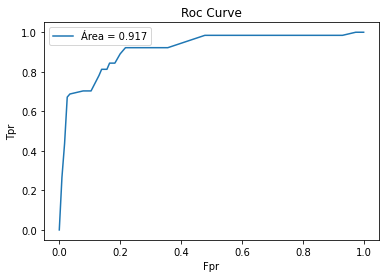

In [127]:
r = roc[:1]
for i in range(1,len(roc)):

    if (roc[i,0] != roc[i-1,0]):

        r = np.append(r, roc[i])

r = r.reshape((int(len(r)/2), 2))

import scipy.integrate as integrate
area = integrate.simps(r[:,1], r[:,0])

plt.plot(r[:,0], r[:,1], label = 'Área = %.3f' %area)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('Roc Curve')
plt.legend()

In [74]:
best_threshold = threshold[np.argmax(np.array(Tp) + np.array(Tn) - np.array(Fp) - np.array(Fn))]

print('best_threshold =', best_threshold)

best_threshold = 0.787878787878788


# Agora vamos utilizar o dataset de teste 

In [46]:
test['Age'] = pd.cut(test['Age'], 6, labels = [1,2,3,4,5,6])
test['Fare'] = pd.cut(test['Fare'], 6, labels = [1,2,3,4,5,6])

In [47]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,3,0,0,330911,1,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,4,1,0,363272,1,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,5,0,0,240276,1,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,3,0,0,315154,1,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2,1,1,3101298,1,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,1,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,4,0,0,PC 17758,2,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,4,0,0,SOTON/O.Q. 3101262,1,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,1,NaN,S


In [49]:
x_test = test[['Sex', 'Fare', 'Age', 'SibSp', 'Pclass', 'Embarked']]
x_test = pd.get_dummies(x_test)
x_test

,SibSp,Pclass,Sex_female,Sex_male,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,3,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,3,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
414,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
415,0,3,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
416,0,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
answer = network.predict(x_test,)

In [56]:
answer

array([[0.11665142],
       [0.3053034 ],
       [0.03992236],
       [0.16632119],
       [0.41163272],
       [0.14556646],
       [0.768212  ],
       [0.14383397],
       [0.5174921 ],
       [0.12143457],
       [0.14464346],
       [0.27027214],
       [0.98717403],
       [0.08384514],
       [0.9851953 ],
       [0.94584584],
       [0.16227135],
       [0.213117  ],
       [0.3936578 ],
       [0.3459053 ],
       [0.8792861 ],
       [0.875839  ],
       [0.98464847],
       [0.379715  ],
       [0.9881346 ],
       [0.13348976],
       [0.9863994 ],
       [0.213117  ],
       [0.27027214],
       [0.16799301],
       [0.16910979],
       [0.13654009],
       [0.3936578 ],
       [0.43563583],
       [0.34706092],
       [0.213117  ],
       [0.41684613],
       [0.47565824],
       [0.14556646],
       [0.14464346],
       [0.1662646 ],
       [0.23779908],
       [0.13200852],
       [0.9296044 ],
       [0.9851953 ],
       [0.14556646],
       [0.28946102],
       [0.077

In [75]:
alive = answer[np.where(answer >= best_threshold)]
alive

array([0.98717403, 0.9851953 , 0.94584584, 0.8792861 , 0.875839  ,
       0.98464847, 0.9881346 , 0.9863994 , 0.9296044 , 0.9851953 ,
       0.9972434 , 0.91236365, 0.9846636 , 0.9819269 , 0.8737719 ,
       0.9949604 , 0.98548555, 0.9977651 , 0.8510051 , 0.9379311 ,
       0.9901501 , 0.9857613 , 0.98972815, 0.9861928 , 0.9947452 ,
       0.83687794, 0.9149189 , 0.95653844, 0.9894619 , 0.9034838 ,
       0.9678626 , 0.9863994 , 0.98784155, 0.8510051 , 0.9296044 ,
       0.9757482 , 0.8878541 , 0.8878541 , 0.8792861 , 0.9296044 ,
       0.9685565 , 0.98717403, 0.98916566, 0.8878541 , 0.8972379 ,
       0.9346773 , 0.88413006, 0.875839  , 0.92747355, 0.9861928 ,
       0.9803072 , 0.9885178 , 0.91256094, 0.8878541 , 0.9972434 ,
       0.98694146, 0.7961124 , 0.887794  , 0.9491377 , 0.9972434 ,
       0.90469253, 0.8878541 , 0.9149189 , 0.92747355, 0.8878541 ,
       0.9296044 , 0.83687794, 0.9677676 , 0.86173296, 0.887794  ,
       0.8972379 , 0.88890415, 0.83687794, 0.9597388 , 0.98576

In [76]:
pred_ans = []
for i in range(len(answer)):
  if answer[i] >= best_threshold:
    pred_ans.append(1)
  else:
    pred_ans.append(0)

# Resultado

In [77]:
df = pd.DataFrame(test['PassengerId'])
df['Survived'] = pred_ans
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
